# Project: Prediction for trending videos on YouTube in USA.
The objective of the project is to predict trending videos based on the number of views, likes, dislikes, number of comments, published date and trending date.

### Team: 
1. Narendra Pahuja <br>
2. Akshay Popli <br>
3. Monika Chandrashekara <br>
4. Prerana Chandrashekar <br>
5. Avijit Jaiswal <br>

### Data :
In this project we are using Trending YouTube Statistics by Mitchell J, Kaggle datasets. 
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day. We have selected US for our Analytics.
The dataset has following attributes:
* video_id – ID of the video
* trending_date – Date the video started to trend
* title – Title of the video 
* channel_title – Channel title of the video
* category_id – Category ID of the video 
* publish_time – Time the video was published
* tags – Places this video was tagged
* views – Number of views for the video
* likes – Number of likes for the video
* dislikes – Number of dislikes for the video
* comment_count – Number of comments for the video
* thumbnail_link – Links to thumbnail this video
* comments_disabled – States True if the comments for the video is disabled else False
* ratings_disabled – States True if the rating is disabled for the video else False
* video_error_or_removed – States True if the video has any error or if it is removed else states False.
* description – Description of the video

URL of the source: https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv


###### NOTE: The plotting of data requires matplotlib, pandas, numpy, seaborn, plotly. These must be imported prior to runnung the code.

In [71]:
import numpy as np     # linear algebra
import pandas as pd    # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data:

The dailey trending videos data in United States of America is stored in file "USvideos.csv". The data from this file is read using pd.read_csv() and stored in USvideo.

In [72]:
USvideo = pd.read_csv("USvideos.csv")
Uscategory=pd.read_csv("US_category_id.csv")
Uscategory_df=Uscategory[['items__id','items__snippet__title']]


Uscategory_df.rename(columns = {'items__id':'category_id','items__snippet__title':'category_title'}, inplace = True) 

USvideo = pd.merge(USvideo, Uscategory_df, on="category_id")


#### Summary of the dataset:

The USvideo contains 16 columns and 40949 rows. 

In [73]:
USvideo.shape

(40949, 17)

#### Information of the metadata of the USvideo dataset:

From USvideo.info() we can get the following information.

Categorical variables are: video_id, trending_date, title, channel_title, publish_time, tags, thumbnail_link, description.

Numerical variables are: category_id, views, likes, dislikes, comment_count.

Boolean variables are:  comments_disabled, ratings_disabled, video_error_or_removed.

In [74]:
USvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_title            40949 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 4.8+ MB


#### Data head pattern analysis

Using .head() the 1st 5 rows of the USvideo is displayed below for pattern analysis.

In [75]:
USvideo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


#### Describing the data columns:

Summary statistics of the USvideo dataset. Gives the record count, average value,standard deviation,minimum and maximum value, data distribution in each quantile for each column in a database.

In [76]:
USvideo.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### Check for null values:
Check for null values and counts the number of null values in the dataset using .isnull().sum() function.
We can observe that there are 570 null values in 'description' of the USvideo dataset as some videos may not contain description,but we are not concerned about description since we will be using tags for our analysis.

In [77]:
USvideo.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_title              0
dtype: int64

### Preprocessing 

__1. Fix null values present:__
The description feature of the USvideo contains 570 null values. The null values will be replaced by 'Missing description'.

In [78]:
USvideo.description.fillna("Missing description", inplace=True)
USvideo.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_title            0
dtype: int64

__2. Preprocess the tags column in the USvideo dataframe:__ 

In [79]:
USvideo.tags = USvideo.tags.str.replace("|", ",")
USvideo.tags = USvideo.tags.str.replace('"',"")#Replace  | w
USvideo.head(23)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
5,pa_oUisZZy0,17.14.11,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,"BuzzFeed,buzzfeed celeb,Mark Ruffalo,Thor,Ragn...",177707,6271,88,275,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs
6,fCTKDn3Q8xQ,17.14.11,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,2017-11-09T11:24:14.000Z,"Japan,Japanese,yt:cc=on,idiot's,guide,squat,to...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs
7,_dhneCO4YEE,17.14.11,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,2017-11-09T07:00:01.000Z,"Full Frontal with Samantha Bee,Full Frontal,Sa...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs
8,EYkEshCOhEU,17.14.11,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,2017-11-10T00:24:29.000Z,"nicole guerriero,arriba liqud lipstick,colourp...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs
9,Eg_kW5fw6qU,17.14.11,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,2017-11-09T23:27:18.000Z,"SuperCarlinBrothers,disney,fox,disney princess...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs


__3.Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition__

Views, likes, dislikes and comments counts have normal distribution.

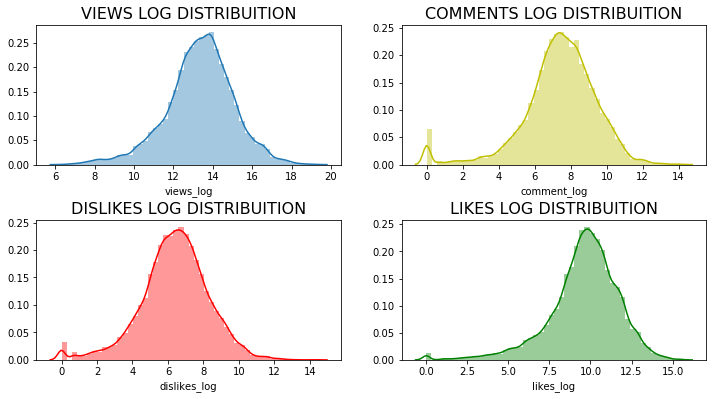

In [80]:
USvideo['likes_log'] = np.log(USvideo['likes'] + 1)
USvideo['views_log'] = np.log(USvideo['views'] + 1)
USvideo['dislikes_log'] = np.log(USvideo['dislikes'] + 1)
USvideo['comment_log'] = np.log(USvideo['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(USvideo['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(USvideo['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(USvideo['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(USvideo['comment_log'], color = 'y')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Exploratory Data Analysis with summary findings

__1. Number of videos under each category:__

The graph below shows maximum number of videos in YouTube belong to category "Entertainment" followed by "Music" and "How to and Style" respectively.

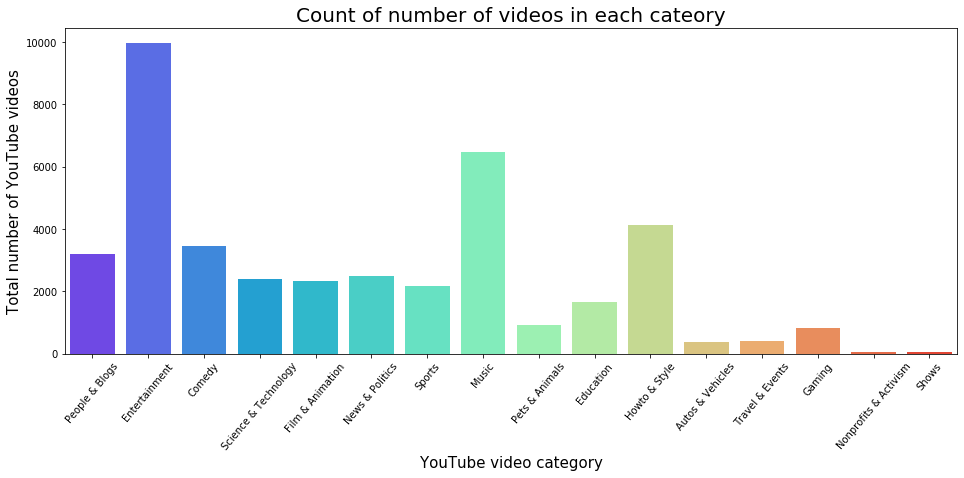

In [81]:
plt.figure(num=None, figsize=(16, 6), facecolor='w')
sns.countplot(x='category_title',data=USvideo, palette="rainbow")
plt.xticks(rotation=50)
plt.xlabel("YouTube video category", fontsize=15)
plt.ylabel('Total number of YouTube videos', fontsize=15)
plt.title('Count of number of videos in each cateory', fontsize=20)
plt.show()

__2. Total number of videos published per month:__

The graph below shows the number of videos published based on month. We can observe the number of videos published from June to November is minimal compared to the rest of the year.


Text(0, 0.5, 'Count')

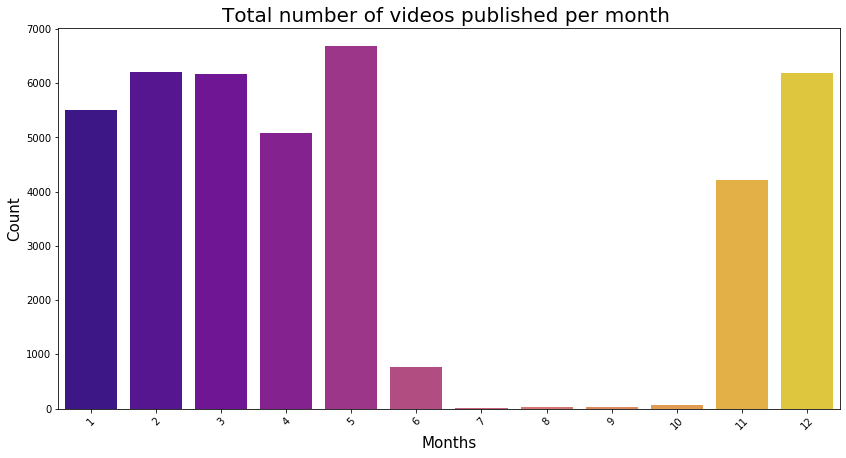

In [82]:
USvideo['publish_time'] = pd.to_datetime(USvideo['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')


USvideo['publish_time_month'] = USvideo['publish_time'].dt.month

plt.figure(figsize = (14,7))

g = sns.countplot(x = 'publish_time_month', data=USvideo, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Total number of videos published per month ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__3. Total number of videos published based on the time of the day:__

We can observe from the graph below maximum number of videos are published 2pm to 6pm.

Text(0, 0.5, 'Count')

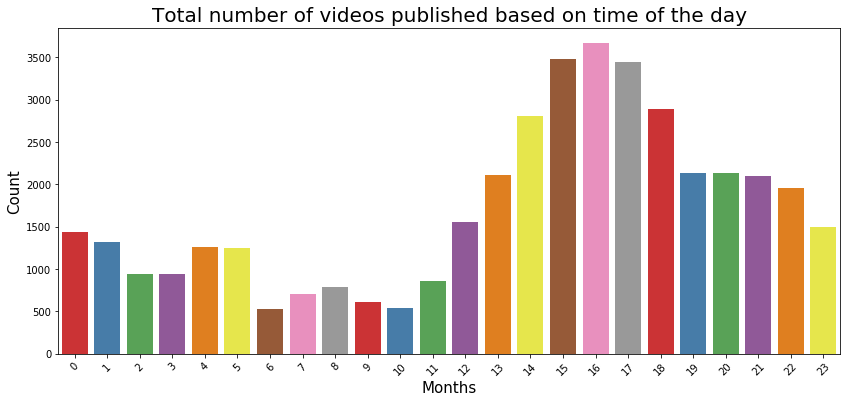

In [83]:
USvideo['publish_time_hour'] = USvideo['publish_time'].dt.hour

plt.figure(figsize = (14,6))


g = sns.countplot(x = 'publish_time_hour', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Total number of videos published based on time of the day", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__4.Treanding videos based on month:__

The graph shows number of videos trending based on month. There are no videos trending in the month of July, August, September and October. We have also observed that there are very few videos published during these months. 

In [84]:
USvideo['trending_date'] = pd.to_datetime(USvideo['trending_date'], format='%y.%d.%m',  errors='coerce')

Text(0, 0.5, 'Count')

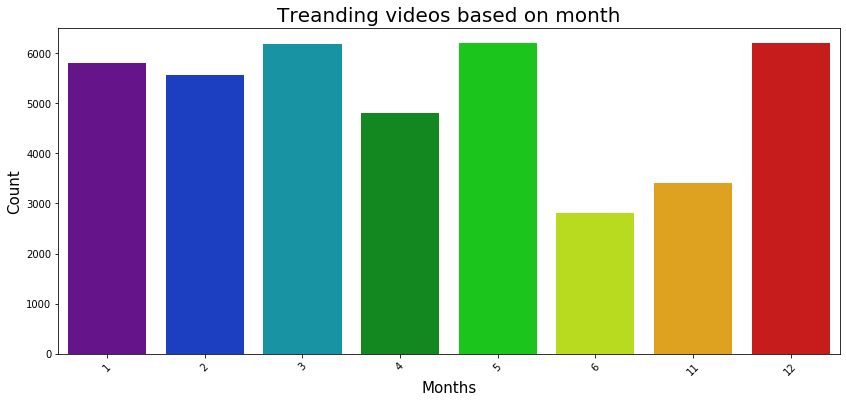

In [85]:
USvideo['trending_date_month'] = USvideo['trending_date'].dt.month

plt.figure(figsize = (14,6))


g = sns.countplot(x = 'trending_date_month', data=USvideo, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Treanding videos based on month", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__5. Distribution of views, likes, dislikes and comments based on the category names:__

Maximum number of views, likes and comments is received for video category Music. Maximum number of likes is received for video category Games.

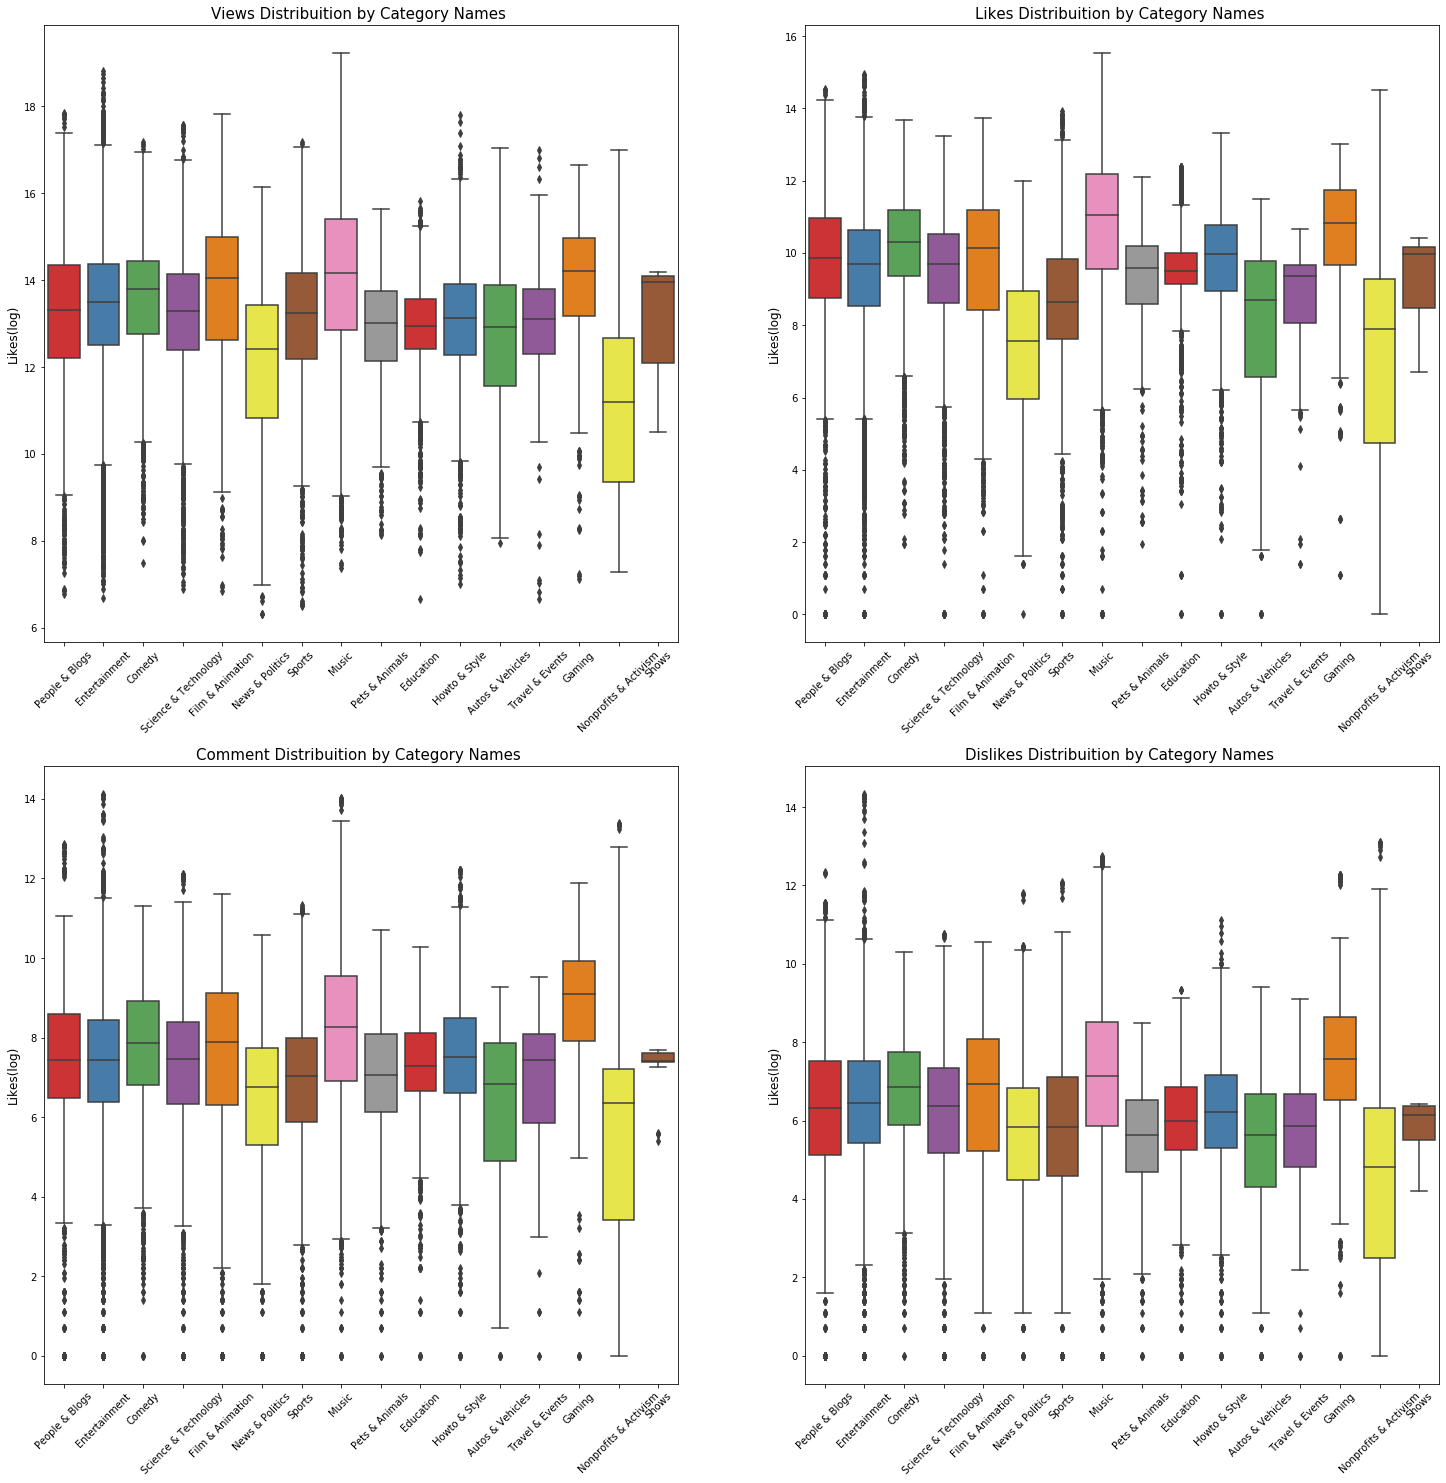

In [86]:
plt.figure(figsize = (25,25))


plt.subplot(222)
g = sns.boxplot(x='category_title', y='likes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)


plt.subplot(221)
g = sns.boxplot(x='category_title', y='views_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(224)
g = sns.boxplot(x='category_title', y='dislikes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(223)
g = sns.boxplot(x='category_title', y='comment_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comment Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)


plt.show()

__6. Different groups of views is created using binning:__

From the graph below we can observe the maximum number of videos on YouTube has views greater than 400000 and less than 1000000.  

In [87]:
bins = [0, 100000, 200000, 300000, 400000, 1000000, 2000000, 5000000, 100000000]
group_names = ['< 100000', '< 200000','< 300000' , '< 400000', '< 1000000', '< 2000000', '< 5000000', '< 100000000']
USvideo['biningC'] = pd.cut(USvideo['views'], bins, labels=group_names)
print(USvideo.groupby('biningC').size())
USvideo.head()

biningC
< 100000       5330
< 200000       3492
< 300000       3347
< 400000       2735
< 1000000      9704
< 2000000      6915
< 5000000      5663
< 100000000    3723
dtype: int64


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,category_title,likes_log,views_log,dislikes_log,comment_log,publish_time_month,publish_time_hour,trending_date_month,biningC
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,10.960027,13.525659,7.995307,9.677528,11,17,11,< 1000000
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute,cats,thai,eggs",98966,2486,184,...,Kittens come out of the eggs in a Thai commerc...,People & Blogs,7.818832,11.502542,5.220356,6.278521,4,6,11,< 100000
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,...,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,8.401109,12.679365,7.480428,6.797940,11,15,11,< 400000
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,...,Molly is an god damn amazing human and she cha...,People & Blogs,8.888895,12.191279,5.384495,6.124683,11,18,11,< 200000
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,"wearing online dollar store makeup for a week,...",2744430,115426,1110,...,I found this online dollar store called ShopMi...,People & Blogs,11.656394,14.825084,7.013016,8.785998,11,1,11,< 5000000


biningC
< 100000       5330
< 200000       3492
< 300000       3347
< 400000       2735
< 1000000      9704
< 2000000      6915
< 5000000      5663
< 100000000    3723
dtype: int64


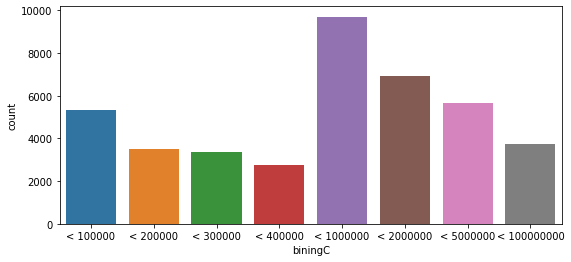

In [88]:
print(USvideo.groupby('biningC').size())
plt.figure(figsize=(9,4))
sns.countplot(x='biningC',data=USvideo)
plt.show()

__Analysis:__

A video on YouTube is said to be trending when it receives a large number of views. Let us consider a trending_date '2017-11-14' and store it in sub_7 dataframe. The videos having top 30 maximum views count is stored in top_videos. From top.head(10) we can observe that videos which have large number of views also have large number of likes, dislikes and comments. Let us further analyse this findings using a correlation matrix.

In [89]:
sub_7=USvideo.loc[USvideo['trending_date'].isin(['2017-11-14'])]
top_videos = sub_7.nlargest(30, ['views']) 
top = pd.DataFrame(top_videos, columns = ['title', 'trending_date', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count']) 

top.head(10)

,title,trending_date,publish_time,views,likes,dislikes,comment_count
26046,Ed Sheeran - Perfect (Official Music Video),2017-11-14,2017-11-09 11:04:14,33523622,1634124,21082,85067
26039,Eminem - Walk On Water (Audio) ft. Beyoncé,2017-11-14,2017-11-10 17:00:03,17158531,787419,43420,125882
26075,Harry Styles - Kiwi,2017-11-14,2017-11-08 13:00:01,9632678,810895,16139,59473
26044,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",2017-11-14,2017-11-10 15:00:00,9548677,190083,15015,11473
35089,John Lewis Christmas Ad 2017 - #MozTheMonster,2017-11-14,2017-11-10 07:38:29,7224515,55681,10247,9479
26055,Camila Cabello - Havana (Vertical Video) ft. Y...,2017-11-14,2017-11-10 05:01:00,5476737,286268,4083,12254
13182,FIRST TIME IM DOING THIS! TALKS WITH LIZA.,2017-11-14,2017-11-10 03:43:43,3578502,307435,2573,12248
13180,When Someone Has A Crush on You | Lilly Singh,2017-11-14,2017-11-09 22:21:13,3371669,202676,3394,20086
13178,Getting My Driver's License | Lele Pons,2017-11-14,2017-11-10 18:30:01,3358068,120876,8279,6408
13174,"Racist Superman | Rudy Mancuso, King Bach & Le...",2017-11-14,2017-11-12 19:05:24,3191434,146033,5339,8181


In [90]:
USvideo_df = pd.DataFrame(USvideo) 

In [91]:
USvideo_df.drop(['video_id', 'category_id', 'likes_log',
       'views_log', 'dislikes_log', 'comment_log', 'publish_time_month',
       'publish_time_hour', 'trending_date_month'], axis=1, inplace=True)
USvideo_df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,biningC
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,< 1000000
1,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,< 100000
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,< 400000
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,< 200000
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,< 5000000


__Correlation graph:__


The correlation graph below shows that views has highest correlation with 'likes'=0.85, followed by 'dislikes' = 0.47 and 'comment_count' = 0.62. From this we can conclude 'views' is highly correlated with 'likes', 'dislikes'and 'comment_count'.

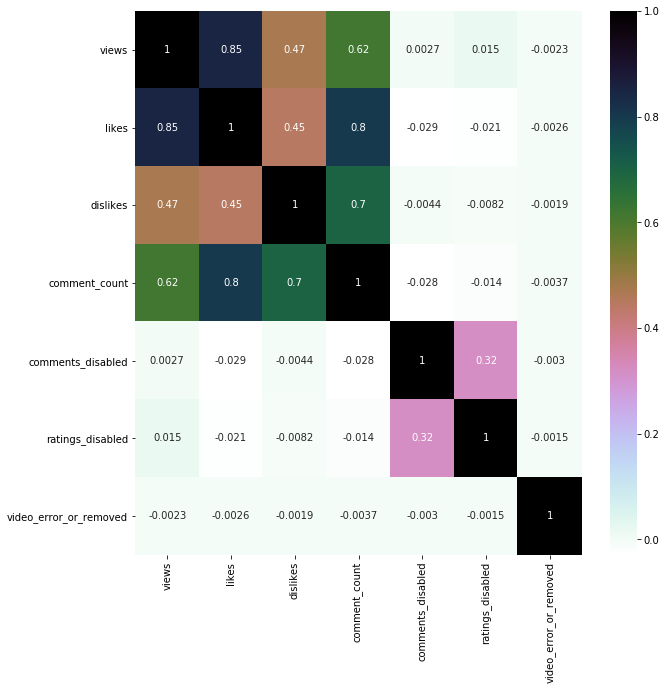

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(USvideo_df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [93]:
# Converting Datetime to date from Object type
USvideo_df['trending_date'] = pd.to_datetime(USvideo_df['trending_date'])
USvideo_df['trending_date'] = USvideo_df['trending_date'].dt.date
USvideo_df['trending_date'] = pd.to_datetime(USvideo_df['trending_date'])

USvideo_df['publish_date'] = pd.to_datetime(USvideo_df['publish_time'])
USvideo_df['publish_date'] = USvideo_df['publish_date'].dt.date
USvideo_df['publish_date'] = pd.to_datetime(USvideo_df['publish_date'])
USvideo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_title            40949 non-null object
biningC                   40909 non-null category
publish_date              40949 non-null datetime64[ns]
dtypes: bool(3), category(1), datetime64[ns](3), int64(4), 

In [94]:
USvideo_df['NumberOfDays'] = pd.to_datetime(USvideo_df['trending_date']) - pd.to_datetime(USvideo_df['publish_date'])

USvideo_df['NumberOfDays'] = USvideo_df.NumberOfDays.dt.days
USvideo_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_title            40949 non-null object
biningC                   40909 non-null category
publish_date              40949 non-null datetime64[ns]
NumberOfDays              40949 non-null int64
dtypes: bool

In [95]:
# Dropping records where publish date is greater than trending date, which is not possible.
USvideo_df = USvideo_df[USvideo_df['NumberOfDays'] > 0]
USvideo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40828 entries, 0 to 40948
Data columns (total 18 columns):
trending_date             40828 non-null datetime64[ns]
title                     40828 non-null object
channel_title             40828 non-null object
publish_time              40828 non-null datetime64[ns]
tags                      40828 non-null object
views                     40828 non-null int64
likes                     40828 non-null int64
dislikes                  40828 non-null int64
comment_count             40828 non-null int64
thumbnail_link            40828 non-null object
comments_disabled         40828 non-null bool
ratings_disabled          40828 non-null bool
video_error_or_removed    40828 non-null bool
description               40828 non-null object
category_title            40828 non-null object
biningC                   40788 non-null category
publish_date              40828 non-null datetime64[ns]
NumberOfDays              40828 non-null int64
dtypes: bool

In [96]:
 
USvideo_df['day_of_week'] = USvideo_df['publish_date'].dt.weekday_name
 

### Conclusion:

In our project we use daily trending YouTube videos dataset from kaggle. The video is said to be trending on YouTube if it has maximum number of views. From the visualizations we have performed we determine the features such as : 'likes', 'dislikes' and 'comment_count' can be used to determine if a video on YouTube is trending or not.